In [1]:
pip install transformers torch datasets scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 17.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [2]:
import pandas as pd
df = pd.read_csv('/content/preprocessed_text.csv')
df

,reel_id,isSafe,UnsafeType,Visual texts,Audio texts,cleaned_text
0,www.facebook.com/reel/1000188341415358,1,Safe,Me on my way to watch Oppenheimer After Berbie,NaN,"['way', 'watch', 'Oppenheimer', 'Berbie']"
1,www.facebook.com/reel/1006146964533997,1,Safe,কোন টেক্সট পাওয়া যায়নি,এ মামা দুইটা সিঙ্গারা আর দুইটা সমুচা একটু তাড়া...,"['টেক্সট', 'পাওয়া', 'যায়নি']"
2,www.facebook.com/reel/1007123741459823,0,Adult,বান্ধবী আমার লাগানির পিনিকে আছে Love in love,পাগলা হাওয়ার বাদল দিনে পাগল আমার মন জেগে ওঠে প...,"['বান্ধবী', 'লাগানির', 'পিনিকে', 'Love', 'love']"
3,www.facebook.com/reel/1007420607202244,1,Safe,প্রত্যেকটা অফিসে এমন একজন কলিগ থাকবেই Laptop,যুদ্ধ আনে ধ্বংস সজনী সজনী তোমারে দেখিয়া মাতাল ...,"['প্রত্যেকটা', 'অফিসে', 'একজন', 'কলিগ', 'থাকবে..."
4,www.facebook.com/reel/1008519870870927,1,Safe,হ্যালো শার্ক ট্যাঙ্ক বাংলাদেশ আই এম কামিং,NaN,"['হ্যালো', 'শার্ক', 'ট্যাঙ্ক', 'বাংলাদেশ', 'এম..."
...,...,...,...,...,...,...
251,www.facebook.com/reel/997262608752854,0,Adult,কোন টেক্সট পাওয়া যায়নি,NaN,"['টেক্সট', 'পাওয়া', 'যায়নি']"
252,www.facebook.com/reel/997300345735398,0,Harmful,কোন টেক্সট পাওয়া যায়নি,NaN,"['টেক্সট', 'পাওয়া', 'যায়নি']"
253,www.facebook.com/reel/998187401354206,1,Safe,খবরঃ কয়লা নিয়ে মোংলা বন্দরে এলো চীনের জাহাজ দে...,NaN,"['খবরঃ', 'কয়লা', 'মোংলা', 'বন্দরে', 'এলো', 'চী..."
254,www.facebook.com/reel/999558344609179,1,Safe,সাকিব আল হাসান to বাংলাদেশী ক্রিকেট ফ্যান,NaN,"['সাকিব', 'আল', 'হাসান', 'বাংলাদেশী', 'ক্রিকেট..."


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df = df[['Visual texts', 'UnsafeType']]
df

,Visual texts,UnsafeType
0,Me on my way to watch Oppenheimer After Berbie,Safe
1,কোন টেক্সট পাওয়া যায়নি,Safe
2,বান্ধবী আমার লাগানির পিনিকে আছে Love in love,Adult
3,প্রত্যেকটা অফিসে এমন একজন কলিগ থাকবেই Laptop,Safe
4,হ্যালো শার্ক ট্যাঙ্ক বাংলাদেশ আই এম কামিং,Safe
...,...,...
251,কোন টেক্সট পাওয়া যায়নি,Adult
252,কোন টেক্সট পাওয়া যায়নি,Harmful
253,খবরঃ কয়লা নিয়ে মোংলা বন্দরে এলো চীনের জাহাজ দে...,Safe
254,সাকিব আল হাসান to বাংলাদেশী ক্রিকেট ফ্যান,Safe


In [5]:
df = df.rename(columns={'Visual texts': 'text', 'UnsafeType': 'label'})
df.head()

,text,label
0,Me on my way to watch Oppenheimer After Berbie,Safe
1,কোন টেক্সট পাওয়া যায়নি,Safe
2,বান্ধবী আমার লাগানির পিনিকে আছে Love in love,Adult
3,প্রত্যেকটা অফিসে এমন একজন কলিগ থাকবেই Laptop,Safe
4,হ্যালো শার্ক ট্যাঙ্ক বাংলাদেশ আই এম কামিং,Safe


In [6]:
df['label'].value_counts()

,count
label,
Safe,160
Adult,66
Harmful,28
Suicidal,2


In [7]:
df['label'], uniques = pd.factorize(df['label'])
uniques

Index(['Safe', 'Adult', 'Harmful', 'Suicidal'], dtype='object')

In [8]:
df.head()

,text,label
0,Me on my way to watch Oppenheimer After Berbie,0
1,কোন টেক্সট পাওয়া যায়নি,0
2,বান্ধবী আমার লাগানির পিনিকে আছে Love in love,1
3,প্রত্যেকটা অফিসে এমন একজন কলিগ থাকবেই Laptop,0
4,হ্যালো শার্ক ট্যাঙ্ক বাংলাদেশ আই এম কামিং,0


In [9]:
train_texts, val_texts, train_labels, val_labels = train_test_split(
    df['text'], df['label'], test_size=0.2, random_state=42
)

In [10]:
from transformers import AutoTokenizer

# Load the tokenizer (you can use 'bert-base-multilingual-cased', 'xlm-roberta-base', or 'csebuetnlp/banglabert')
model_name = "xlm-roberta-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Tokenize datasets
def tokenize_data(texts, tokenizer, max_length=128):
    return tokenizer(
        list(texts),
        max_length=max_length,
        truncation=True,
        padding=True,
        return_tensors="pt"  # PyTorch tensors
    )

train_encodings = tokenize_data(train_texts, tokenizer)
val_encodings = tokenize_data(val_texts, tokenizer)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/615 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

In [11]:
import torch
from datasets import Dataset

# Convert data into Hugging Face Dataset format
train_data = Dataset.from_dict({"text": train_texts.tolist(), "label": train_labels.tolist()})
val_data = Dataset.from_dict({"text": val_texts.tolist(), "label": val_labels.tolist()})

In [12]:
def preprocess_function(examples):
    return tokenizer(
        examples['text'],
        padding=True,
        truncation=True,
        max_length=512,
)

In [13]:
train_data = train_data.map(preprocess_function, batched=True)
val_data = val_data.map(preprocess_function, batched=True)

Map:   0%|          | 0/204 [00:00<?, ? examples/s]

Map:   0%|          | 0/52 [00:00<?, ? examples/s]

In [14]:
train_data.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])
val_data.set_format(type="torch", columns=["input_ids", "attention_mask", "label"])

In [15]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=4
)

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [16]:
from transformers import TrainingArguments

In [17]:
training_args = TrainingArguments(
    output_dir="./results",             # Directory to save results
    evaluation_strategy="epoch",       # Evaluate at the end of every epoch
    learning_rate=5e-5,                # Learning rate
    per_device_train_batch_size=16,    # Batch size for training
    per_device_eval_batch_size=16,     # Batch size for evaluation
    num_train_epochs=3,                # Number of epochs
    weight_decay=0.01,                 # Weight decay
    logging_dir="./logs",              # Directory for logging
    logging_steps=10,                  # Log every 10 steps
    save_strategy="epoch",             # Save model at each epoch
    load_best_model_at_end=True,       # Load the best model at the end
    metric_for_best_model="f1",        # Use F1 score to select the best model
    greater_is_better=True,            # F1 score: Higher is better
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [18]:
pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.1 MB/s eta 0:00:00


In [19]:
import evaluate
import numpy as np

# Load metrics using the evaluate library
f1_metric = evaluate.load("f1")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")

In [20]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)

    # Compute F1, precision, and recall
    f1 = f1_metric.compute(predictions=predictions, references=labels, average="weighted")
    precision = precision_metric.compute(predictions=predictions, references=labels, average="weighted")
    recall = recall_metric.compute(predictions=predictions, references=labels, average="weighted")

    return {
        "f1": f1["f1"],
        "precision": precision["precision"],
        "recall": recall["recall"],
    }

In [21]:
from transformers import Trainer

trainer = Trainer(
    model=model,                         # Pretrained model
    args=training_args,                  # Updated training arguments
    train_dataset=train_data,            # Training data
    eval_dataset=val_data,               # Validation data
    tokenizer=tokenizer,                 # Tokenizer
    compute_metrics=compute_metrics      # Updated metrics function
)

trainer.train()

<ipython-input-21-83a16a54b980>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


Epoch,Training Loss,Validation Loss,F1,Precision,Recall
1,1.125000,0.947647,0.468864,0.378698,0.615385
2,0.988800,0.926677,0.468864,0.378698,0.615385
3,1.041000,0.869954,0.468864,0.378698,0.615385


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


TrainOutput(global_step=39, training_loss=1.0321749662741637, metrics={'train_runtime': 201.726, 'train_samples_per_second': 3.034, 'train_steps_per_second': 0.193, 'total_flos': 161026857418752.0, 'train_loss': 1.0321749662741637, 'epoch': 3.0})

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


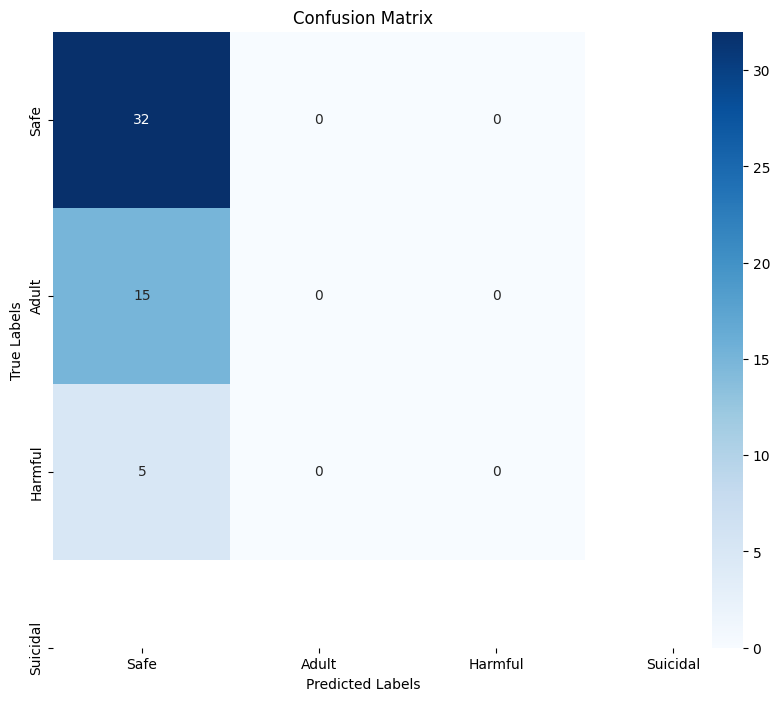

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

predictions = trainer.predict(val_data)
predicted_labels = np.argmax(predictions.predictions, axis=-1)
cm = confusion_matrix(val_labels, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=uniques, yticklabels=uniques)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()